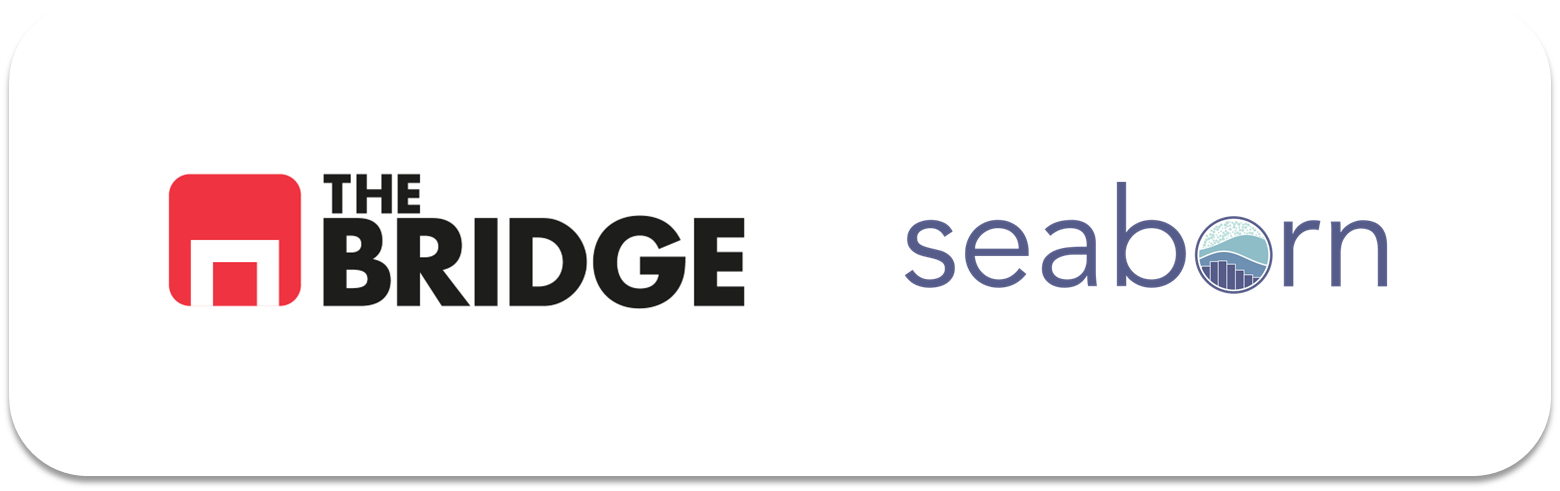

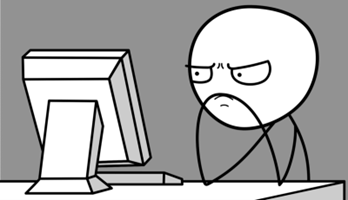

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_btc = pd.read_csv("./data/BTC.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [3]:
df_btc.set_index(pd.to_datetime(df_btc["date"]), inplace = True) # En una sol línea, equivalente a :

df_btc["date"] = pd.to_datetime(df_btc["date"])
df_btc.set_index("date", inplace = True)

### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [4]:
def pinta_categoricas(df, columnas, ancho_figura = 12): # Las dimensiones de la figura global no se piden pero le añado yo el parámetro del ancho, el alto dependerá del número de filas
    # Calcular el número de filas necesario para la matriz de gráficos
    n_rows = (len(columnas) + 1) // 2 # Se obtiene el número de filas, si hay 3 columnas -> 4//2 = 2, recuerda que // da sólo el cociente

    # Crear el subplots o matriz de gráficos
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4)) # La altura de la fig

    # Si lo de usar coordenadas no te va, usa este truco que es usar el métdodo flatten de numpy que convierte cualquier array en un array unidimensional (una lista vaya)
    axs = axs.flatten()

    # HASTA AQUI ES COMUN A TODAS LAS FUNCIONES DEL RESTO DE EJERCICIOS EN LOS QUE SE PIDEN FUNCIONES (salvo el último)

    # Iterar a través de las columnas y crear gráficos de barras
    for i, col in enumerate(columnas):
        # Contar frecuencias en la columna
        #count_data = df[col].value_counts()

        # Crear gráfico de barras con Seaborn
        #sns.barplot(x=count_data.index, y=count_data.values, ax=axs[i])
        sns.countplot(x= col, data = df, ax = axs[i], hue = col, legend= False ) 
        # Configurar título y etiquetas
        axs[i].set_title(f'Frecuencias Absolutas de {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frecuencia')

    # Ocultamos ejes adicionales si el número de gráficos es impar
    if len(columnas) % 2 != 0:
        axs[-1].axis('off')

    # Ajustamos el layout
    plt.tight_layout()
    plt.show()



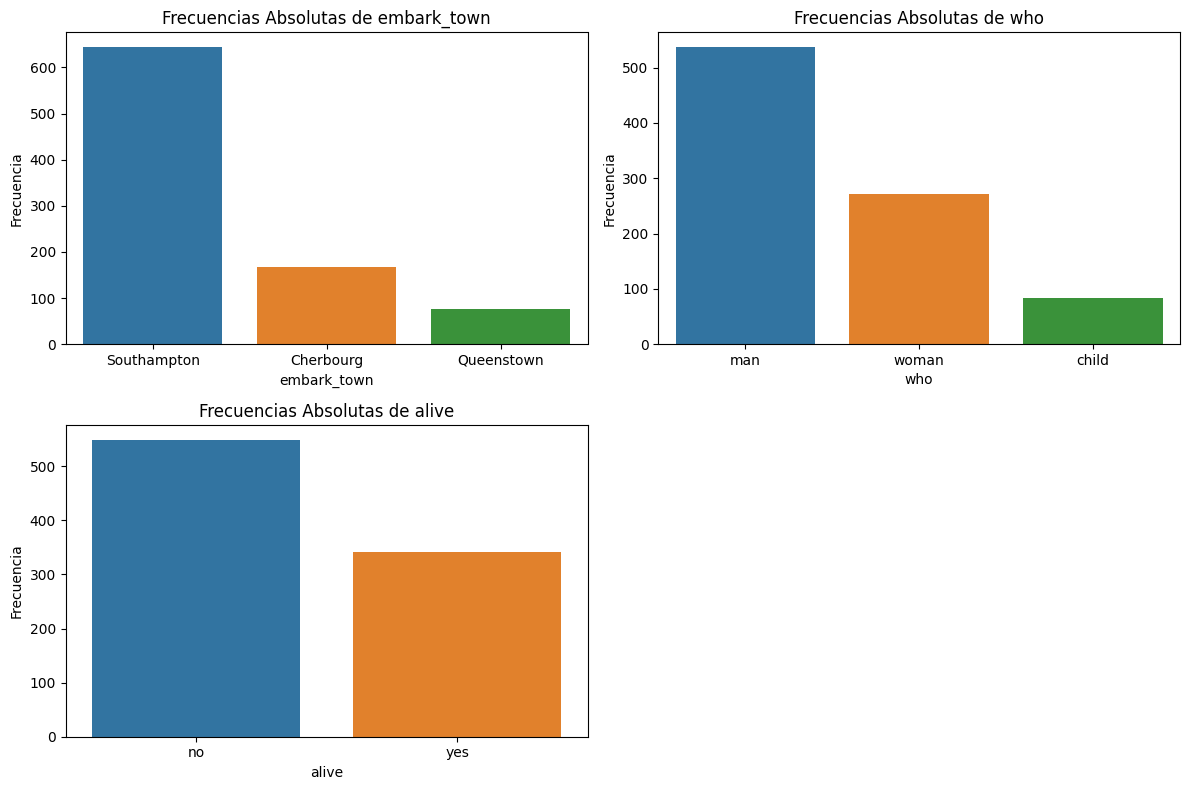

In [5]:
pinta_categoricas(df_titanic, ["embark_town", "who", "alive"])

### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


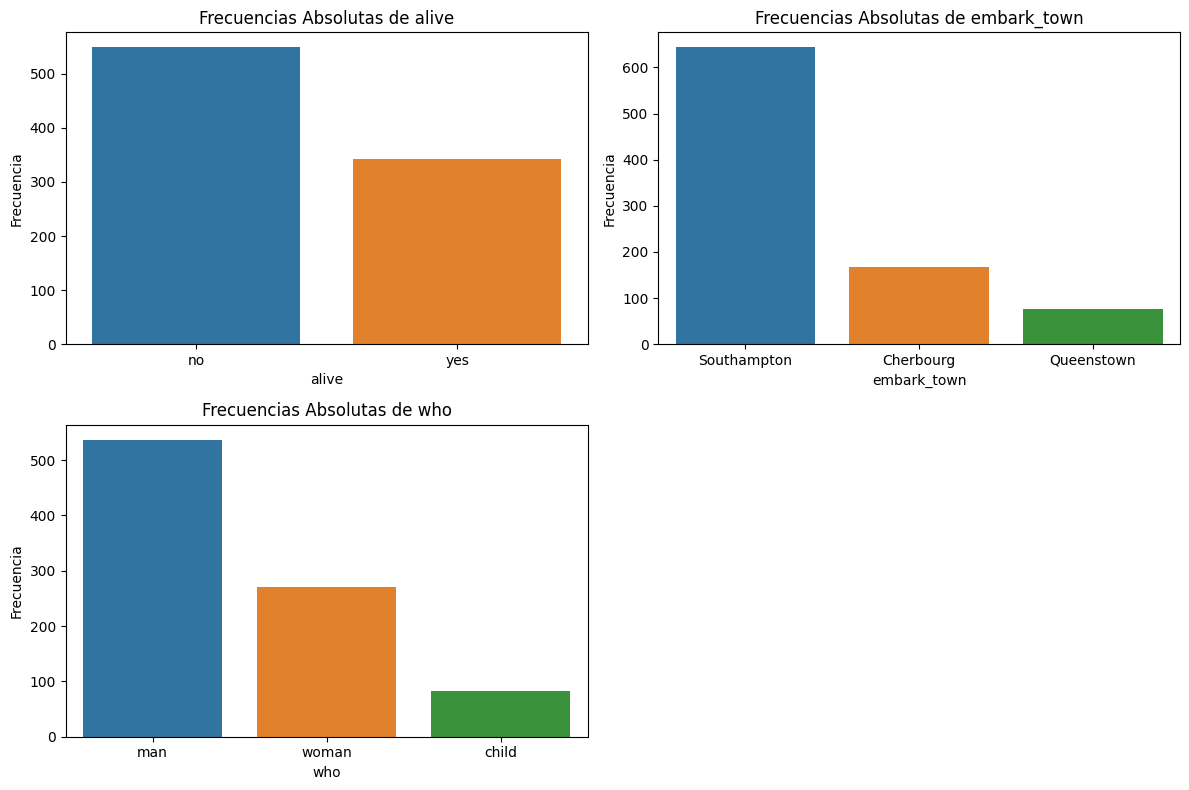

In [6]:
lista = ["alive","embark_town","who"]
pinta_categoricas(df_titanic, lista)

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [7]:

def pinta_histogramas(df, columnas, bins= 10, densidad= False, titulo = ""): # El argumento titulo se lo he añadido yo por temas de claridad (no se pide en el enunciado)
    # Empleamos el mismo código que en la función anterior para la matriz de figuras:
    n_rows = (len(columnas) + 1) // 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axs = axs.flatten()

    # Función por función pintamos cada histograma usando los argumentos de la función para pasárselos a seaborn
    for i, col in enumerate(columnas):
        sns.histplot(df[col], bins=bins, kde=densidad, ax=axs[i])
        axs[i].set_title(f'Histograma de {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Conteo')

    if len(columnas) % 2 != 0:
        axs[-1].axis('off')

    if titulo: # "" es False, si no se da título no se ejecuta el código de if
        fig.suptitle(titulo)
        
    plt.tight_layout()
    plt.show()
    return fig


### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

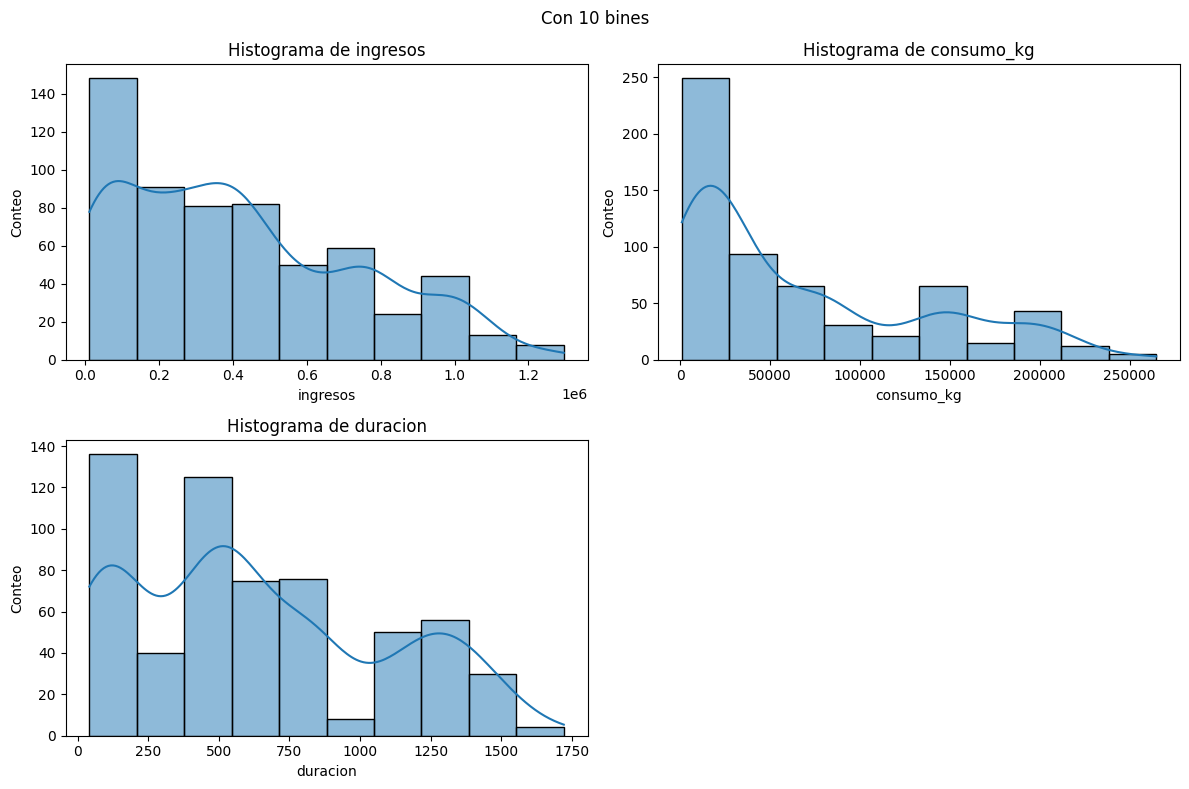

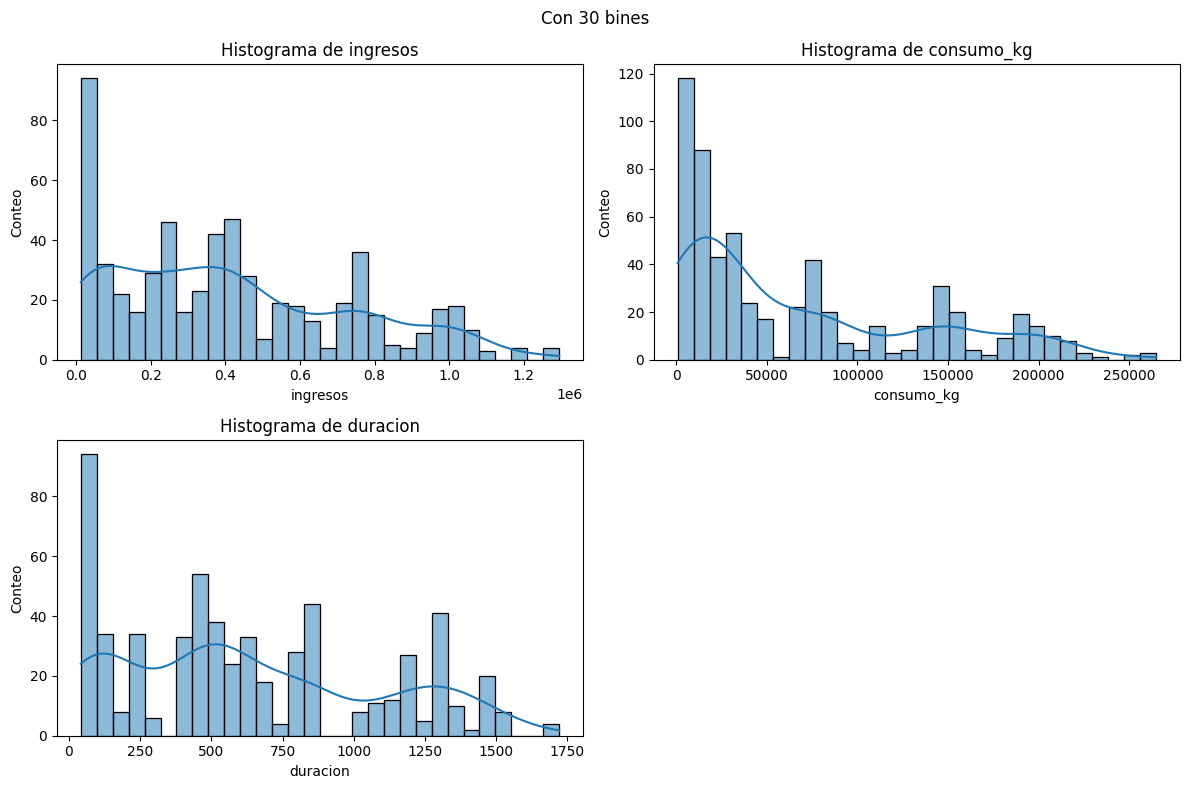

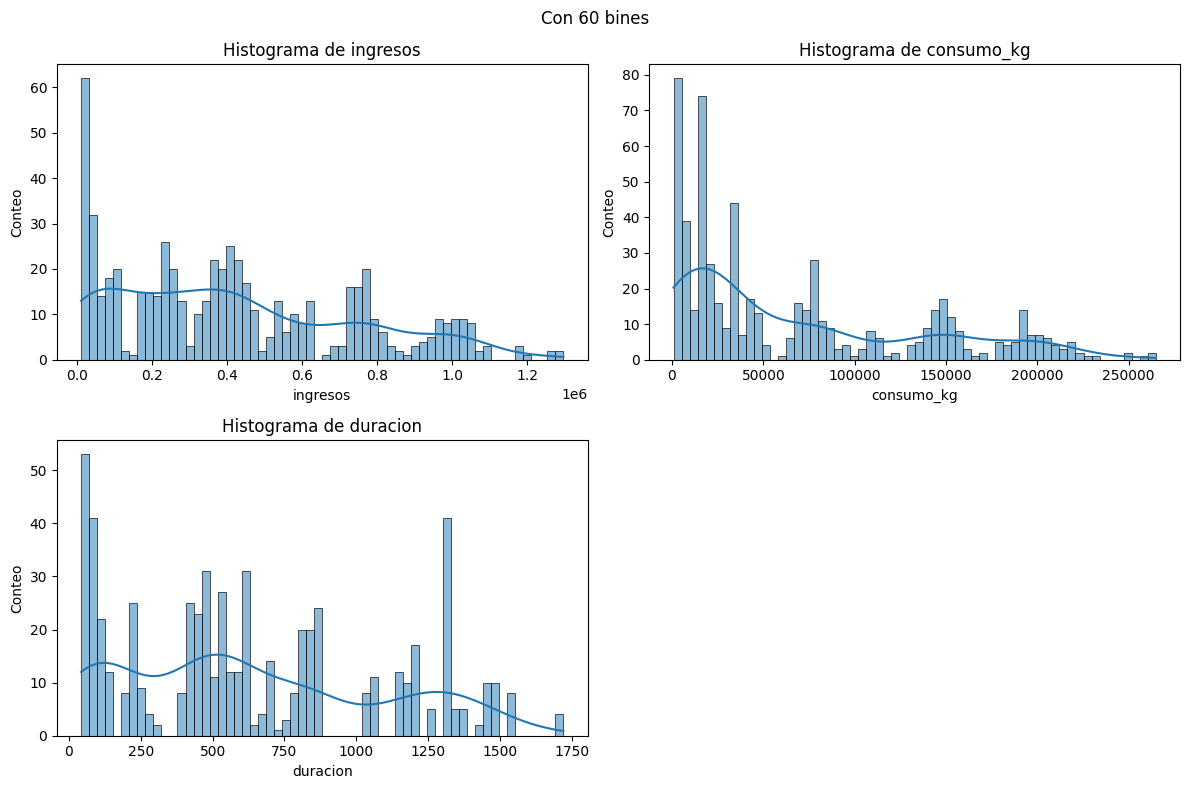

In [8]:
columnas = ["ingresos","consumo_kg","duracion"]
bines = [10,30,60]
for bin in [10,30,60]:
   pinta_histogramas(df_viajes, columnas, bins = bin, densidad = True, titulo = f"Con {bin} bines")
   

*Si mi objetivo es márcar los cuatro grupos o tipos de viajes me quedaría con la opción de 30 o de 60, quizás con la de 60, quitando los ejes y el kde, para marcar sólo la existencia de esos cuatro grupos (rodéandlos o encuadrándolos)*

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [9]:
def pinta_series_temporales(df, columnas_numericas):
    n_rows = (len(columnas_numericas) + 1) // 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axs = axs.flatten()

    for i, col in enumerate(columnas_numericas):
        sns.lineplot(data=df[col], ax=axs[i])
        axs[i].set_title(f'Serie Temporal de {col}')
        axs[i].set_xlabel('Índice')
        axs[i].set_ylabel(col)

    if len(columnas_numericas) % 2 != 0:
        axs[-1].axis('off')

    plt.tight_layout()
    plt.show()


### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

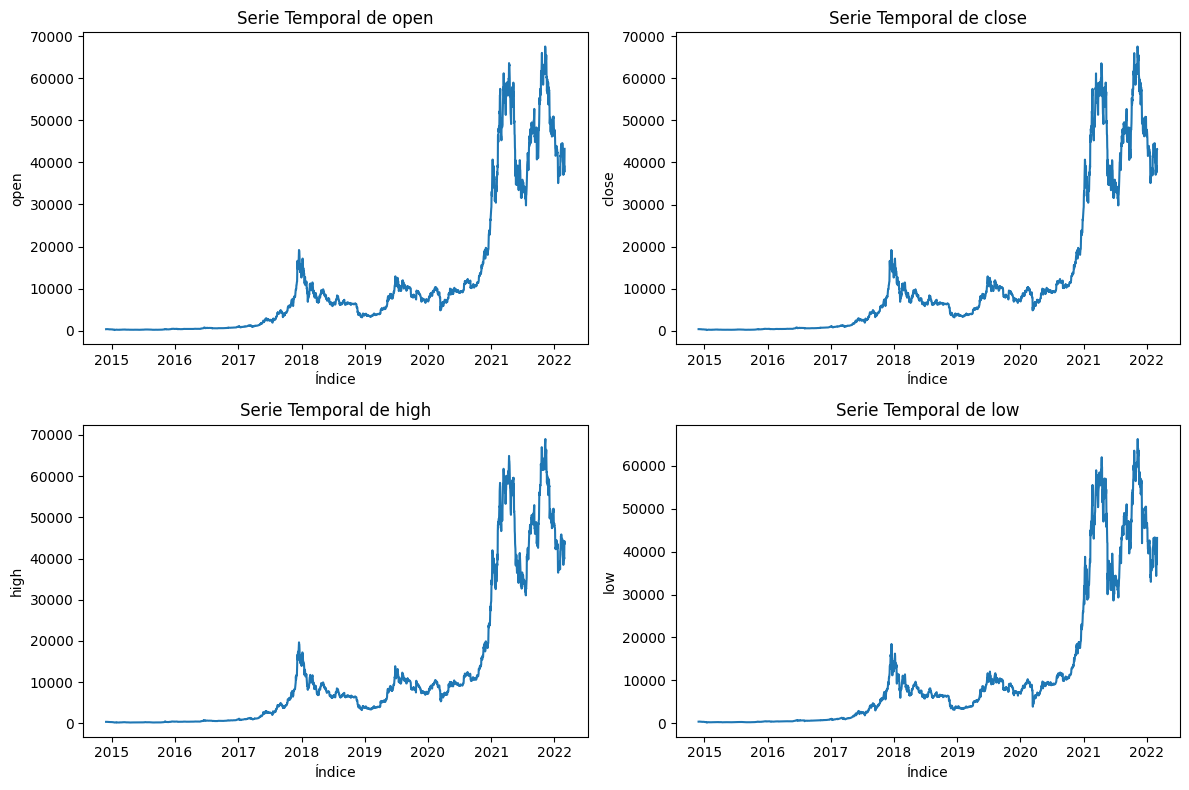

In [10]:
columnas = ["open","close","high","low"]
pinta_series_temporales(df_btc, columnas)

*Cuando tienen el mismo rango temporal, en general es mejor visualizar todas las gráficas juntas para poder compararlas y para poder mostrar esa comparación, de ahí los dos siguientes ejercicios*

### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [11]:
def pinta_series_temporales(df, columnas_numericas, todo_junto =False, inicio= None, fin= None):
    if inicio and fin: # Recuerda que el valor booleano de None es False, por lo tanto así como están por defecto (los dos a None) este if no se cumpliría
        #df = df[(df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))]
        df = df.loc[inicio:fin]

    if todo_junto:
        fig,axs = plt.subplots(1,1, figsize=(10, 6)) # Quiero un objeto axes para poder manipularlo posteriormente, en el caso de que tenga que hacerlo
        for col in columnas_numericas:
            sns.lineplot(data=df[col], label=col)
        plt.legend() 
        plt.title('Comparativa Conjunta')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')

    else:
        n_rows = (len(columnas_numericas) + 1) // 2
        fig, axs = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
        axs = axs.flatten()

        for i, col in enumerate(columnas_numericas):
            sns.lineplot(data=df[col], ax=axs[i])
            axs[i].set_title(f'Serie Temporal de {col}')
            axs[i].set_xlabel('Índice')
            axs[i].set_ylabel(col)

        if len(columnas_numericas) % 2 != 0:
            axs[-1].axis('off')
        plt.tight_layout()

    plt.show()
    return fig,axs # DEvuelvo el objeto Figure y los Axes por si quiero hacer cambios posteriores, como si que querré


### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

In [12]:
fig,axs = pinta_series_temporales(df_btc, columnas, todo_junto = True, inicio = "06-2020", fin = "12-2022")

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

*Desde un punto de visualizacion tampoco me gusta, los valores del eje y tienen tanto rango que no se ven las variaciones. Claro que puede que quiera transmitir ese mensaje le cambio de Enero de 2021 o de octubre de 2020 que hace que luego no se vean más variaciones. Si no es el caso, tendré que cambiar los límites del eje y...*

In [ ]:
axs.set_ylim(30000,75000)
fig

*Los cambios son tan altos que tampoco me deja ver mucho, por lo que esa sería mi conclusión y lo que haría sería visualizar en la gráfica total los diferenciales en porcentaje entre altos y bajos*

In [ ]:
axs.set_ylim(0,75000)
df_btc_viz = df_btc.loc["06-2020":"12-2022"]
axs.hlines( y= df_btc_viz.loc[df_btc_viz.index.max(),"close"], xmin = pd.to_datetime("06-2020"), xmax = df_btc_viz.index.max())
axs.hlines( y = df_btc_viz.loc[df_btc_viz.close.idxmin(), "close"],  xmin = pd.to_datetime("06-2020"), xmax = df_btc_viz.index.max())
variacion = (df_btc_viz.loc[df_btc_viz.index.max(),"close"]/df_btc_viz.close.min() * 100).round(2)
axs.annotate(xy=(pd.to_datetime("08-2020"),df_btc_viz.close.min()),\
     xytext = (pd.to_datetime("06-2020"),30000), text = f"Variación {variacion}%", arrowprops = dict(arrowstyle = "->"))
axs.annotate(xy=(pd.to_datetime("08-2020"),df_btc_viz.loc[df_btc_viz.index.max(),"close"]),\
     xytext = (pd.to_datetime("06-2020"),30000), text = f"Variación {variacion}%", arrowprops = dict(arrowstyle = "->"))
axs.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     axs.spines[spine].set_visible(False)
fig

*Observa como hemos quitado el eje y (lo hemos hecho invisible) y los marcos de la figura ("spines"):*

```python
axs.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     axs.spines[spine].set_visible(False)
```

los spines son cada una de las líneas del marco de un "Axes" y se referencian por "left" (izquierda), "right" (derecha), "top" (superior), "bottom" (inferior)